In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
(images, labels), (test_images, test_labels) = mnist.load_data()
#Data in MNIST are set to 60.000 for training and 10.000 for testing by default

In [2]:
valid_images, valid_labels = images[55000:], labels[55000:]
training_images, training_labels = images[:55000], labels[:55000]

In [3]:
import matplotlib.pyplot as plt


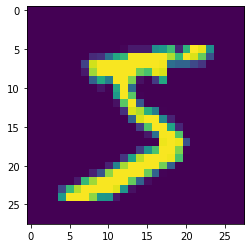

In [4]:
plt.imshow(training_images[0])

In [5]:
training_images.shape

(55000, 28, 28)

In [6]:
valid_images.shape

(5000, 28, 28)

In [7]:
training_images[0].shape

(28, 28)

In [8]:
training_labels[0]

5

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import MaxPooling2D


In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = "same", input_shape = (28, 28, 1), activation= "relu"))
model.add(MaxPooling2D(pool_size= (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation= "relu"))
# model.add(Activation("relu"))
model.add(Dense(10, activation= "softmax"))
# model.add(Activation("softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
_________________________________________________________________


In [12]:
normalized_training_images = training_images/255.0
normalized_training_images = normalized_training_images.reshape(55000, 28, 28, 1)
normalized_valid_images = valid_images/255.0
normalized_valid_images = normalized_valid_images.reshape(5000, 28, 28, 1)

In [13]:
training_labels.shape

(55000,)

In [14]:
test_images.shape

(10000, 28, 28)

In [25]:
# normalized_test_images = test_images / 255.0
# test_images = test_images.reshape(10000, 28, 28, 1)

In [16]:
model.compile(optimizer= "adam", loss = "sparse_categorical_crossentropy", metrics= "accuracy")

In [17]:
trained_model = model.fit(normalized_training_images, training_labels, epochs = 10, validation_data=(normalized_valid_images, valid_labels))

Epoch 1/10
1719/1719 [==============================] - 39s 22ms/step - loss: 0.1540 - accuracy: 0.9539 - val_loss: 0.0619 - val_accuracy: 0.9846
Epoch 2/10
1719/1719 [==============================] - 37s 22ms/step - loss: 0.0528 - accuracy: 0.9836 - val_loss: 0.0496 - val_accuracy: 0.9864
Epoch 3/10
1719/1719 [==============================] - 36s 21ms/step - loss: 0.0335 - accuracy: 0.9891 - val_loss: 0.0449 - val_accuracy: 0.9880
Epoch 4/10
1719/1719 [==============================] - 36s 21ms/step - loss: 0.0209 - accuracy: 0.9933 - val_loss: 0.0441 - val_accuracy: 0.9878
Epoch 5/10
1719/1719 [==============================] - 36s 21ms/step - loss: 0.0150 - accuracy: 0.9952 - val_loss: 0.0488 - val_accuracy: 0.9878
Epoch 6/10
1719/1719 [==============================] - 36s 21ms/step - loss: 0.0113 - accuracy: 0.9964 - val_loss: 0.0461 - val_accuracy: 0.9902
Epoch 7/10
1719/1719 [==============================] - 35s 21ms/step - loss: 0.0091 - accuracy: 0.9971 - val_loss: 0.0524 -

In [27]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [29]:
cd /content/drive/MyDrive/ML/MNIST Digits Classification

/content/drive/MyDrive/ML/MNIST Digits Classification


In [30]:
model.save("MNIST.h5")